In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab_datasets/ETH-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1598 non-null   datetime64[ns]
 1   Open       1598 non-null   float64       
 2   High       1598 non-null   float64       
 3   Low        1598 non-null   float64       
 4   Close      1598 non-null   float64       
 5   Adj Close  1598 non-null   float64       
 6   Volume     1598 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.5 KB


In [ ]:
data.set_index('Date', inplace = True)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


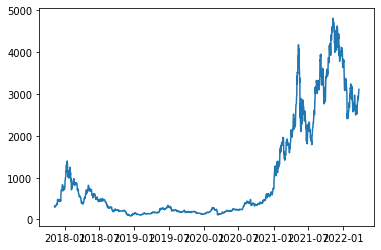

In [ ]:
plt.plot(data['Open'])
plt.rcParams['figure.figsize']=(15,10)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(data['Open'])

ADF Statistics: -0.6106183908397493
p- value: 0.8685646089538173
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
data['Open_first_deference']=data['Open']-data['Open'].shift(1)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Open_first_deference
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,NaN
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,12.026001
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,-22.084991
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,16.104003
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,-7.665008


In [ ]:
adf_test(data['Open_first_deference'].dropna())

ADF Statistics: -8.618890358788795
p- value: 6.182001066476927e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
## Use Techniques Differencing
data['Open_second_deference']=data['Open_first_deference']-data['Open_first_deference'].shift(1)

In [ ]:
adf_test(data['Open_second_deference'].dropna())

ADF Statistics: -14.264619176487011
p- value: 1.4075307610721742e-26
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
### 12 months
## Use Techniques Differencing
data['Open_twelve_deference']=data['Open']-data['Open'].shift(12)

In [ ]:
adf_test(data['Open_twelve_deference'].dropna())

ADF Statistics: -5.094732341694918
p- value: 1.4364969264526349e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

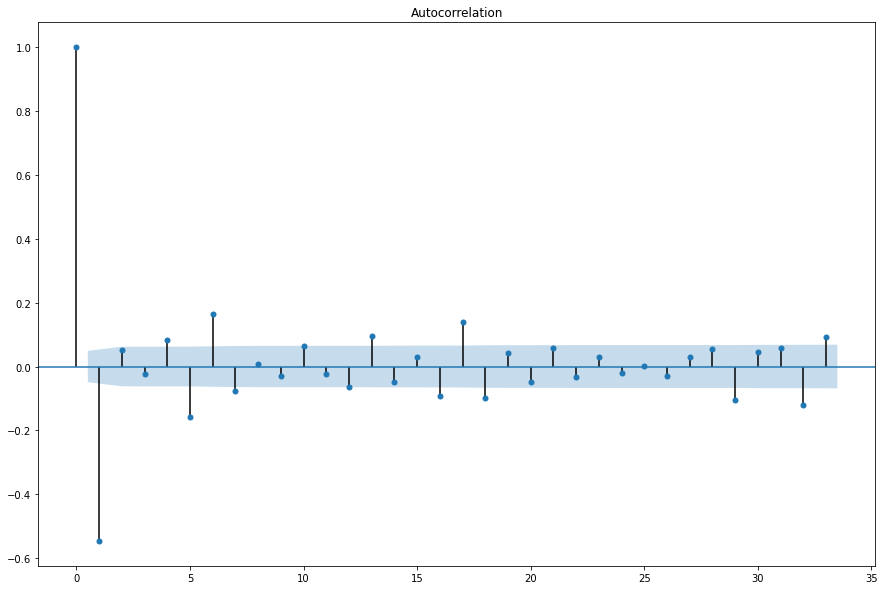

In [ ]:
acf = plot_acf(data['Open_second_deference'].dropna())

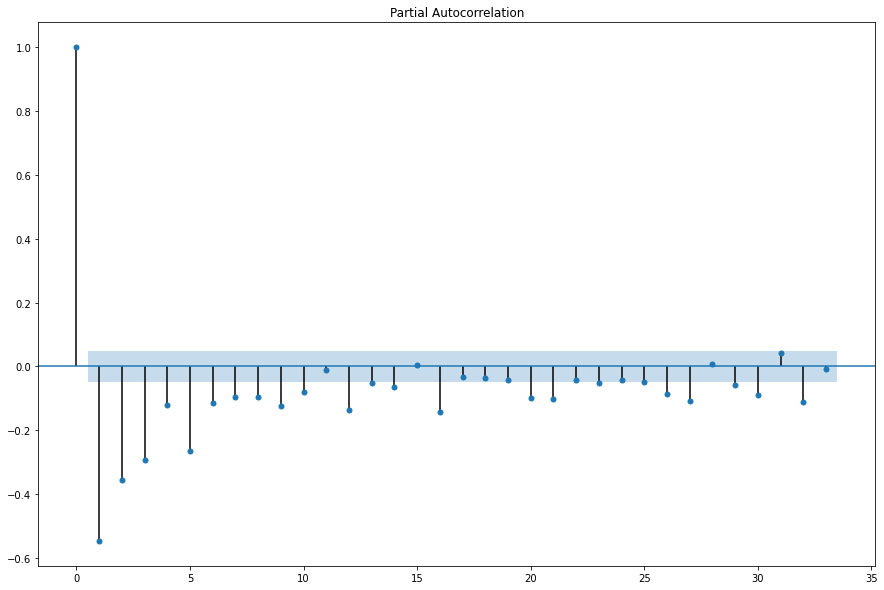

In [ ]:
pacf = plot_pacf(data['Open_second_deference'].dropna())

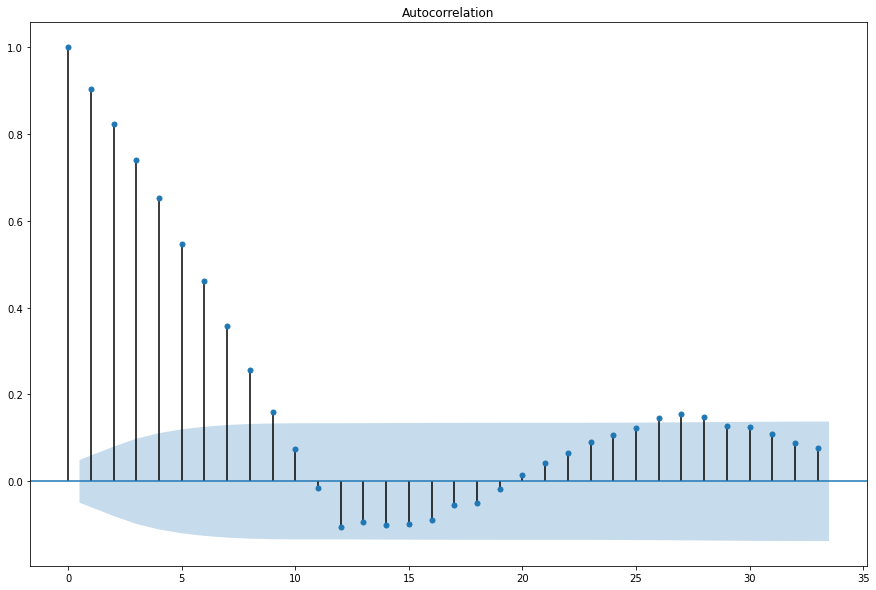

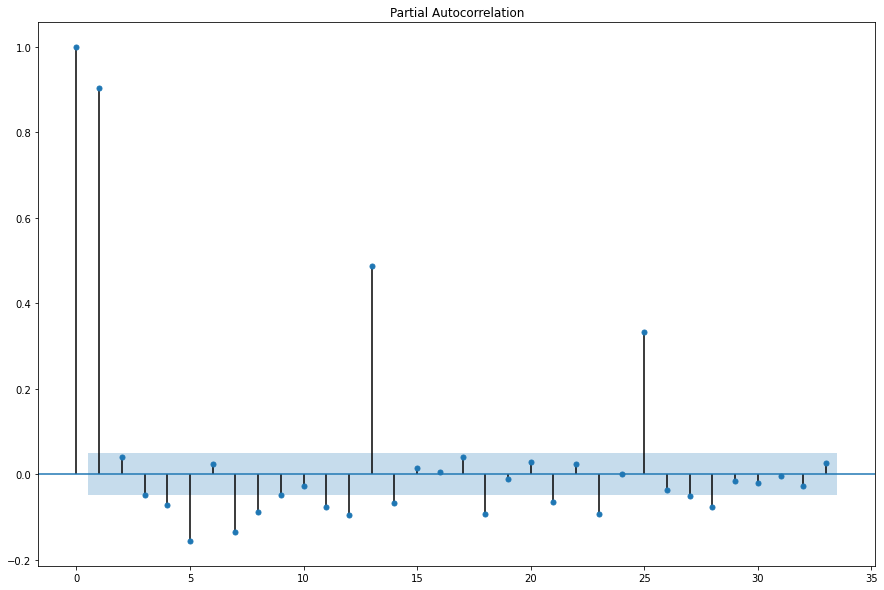

In [ ]:
acf12 = plot_acf(data['Open_twelve_deference'].dropna())
pacf12 = plot_pacf(data['Open_twelve_deference'].dropna())

In [ ]:
 !pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
stepwise_fit = auto_arima(data['Open'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18507.921, Time=4.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18532.958, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18524.056, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18524.386, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18531.725, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18527.015, Time=1.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18527.771, Time=0.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18508.625, Time=7.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18488.555, Time=8.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18521.398, Time=5.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18499.454, Time=11.19 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=18490.881, Time=5.47 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=18509.747, Time=3.11 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=18498.145, Time=5.41 sec
 ARIMA(2,1,3)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1598
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -9237.719
Date:                Fri, 16 Dec 2022   AIC                          18487.437
Time:                        09:49:28   BIC                          18519.692
Sample:                    11-09-2017   HQIC                         18499.416
                         - 03-25-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8147      0.017   -107.711      0.000      -1.848      -1.782
ar.L2         -0.8968      0.016    -56.810      0.000      -0.928      -0.866
ma.L1          1.7598      0.020     89.806      0.000       1.721       1.798
ma.L2          0.7959      0.029     27.545      0.000       0.739       0.852
ma.L3         -0.0734      0.014     -5.161      0.000      -0.101      -0.046
sigma2      6190.0042     80.221     77.162      0.000    6032.773    6347.235
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21916.08
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              16.41   Skew:                            -0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Open_first_deference,Open_second_deference,Open_twelve_deference
Date,,,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,NaN,NaN,NaN
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,12.026001,NaN,NaN
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,-22.084991,-34.110992,NaN
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,16.104003,38.188994,NaN
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,-7.665008,-23.769011,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098,-86.444336,-88.270263,282.937988
2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230,37.670899,124.115235,168.657715
2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658,75.370850,37.699951,364.873780


In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,3,25)
test_dataset_end=datetime(2022,3,25)

In [ ]:
train_data=data[:train_dataset_end]
test_data=data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Open_first_deference,Open_second_deference,Open_twelve_deference
Date,,,,,,,,,
2021-03-26,1595.210083,1702.922852,1594.736694,1702.842041,1702.842041,22548516548,2.086792,86.966064,-328.653687
2021-03-27,1703.036133,1732.824341,1674.319336,1716.494629,1716.494629,18102277710,107.826050,105.739258,-151.050537
2021-03-28,1716.405640,1728.584106,1672.660400,1691.355957,1691.355957,16599472938,13.369507,-94.456543,-76.008178
2021-03-29,1691.263184,1837.187988,1683.716553,1819.684937,1819.684937,22796570548,-25.142456,-38.511963,-115.792968
2021-03-30,1819.466309,1860.974731,1793.922363,1846.033691,1846.033691,22512781703,128.203125,153.345581,-3.692138
...,...,...,...,...,...,...,...,...,...
2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098,-86.444336,-88.270263,282.937988
2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230,37.670899,124.115235,168.657715
2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658,75.370850,37.699951,364.873780


In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train_data

,Open,High,Low,Close,Adj Close,Volume,Open_first_deference,Open_second_deference,Open_twelve_deference
Date,,,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,NaN,NaN,NaN
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,12.026001,NaN,NaN
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,-22.084991,-34.110992,NaN
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,16.104003,38.188994,NaN
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,-7.665008,-23.769011,NaN
...,...,...,...,...,...,...,...,...,...
2021-03-21,1812.606567,1823.353027,1764.139282,1788.217041,1788.217041,22977404620,-4.916138,-39.870117,-22.541504
2021-03-22,1788.362183,1811.968262,1674.299805,1691.333984,1691.333984,23599296129,-24.244384,-19.328246,-80.126831
2021-03-23,1690.871826,1725.108765,1662.539917,1678.650146,1678.650146,21998237965,-97.490357,-73.245973,-107.162110


In [ ]:
model_ARIMA=ARIMA(train_data['Open'],order=(2,1,3))

In [ ]:
model_Arima_fit=model_ARIMA.fit()

In [ ]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                 1232
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5996.845
Method:                       css-mle   S.D. of innovations             31.450
Date:                Fri, 16 Dec 2022   AIC                          12007.689
Time:                        09:49:29   BIC                          12043.504
Sample:                    11-10-2017   HQIC                         12021.163
                         - 03-25-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0443      0.895      1.167      0.243      -0.710       2.799
ar.L1.D.Open     0.4065      0.030     13.372      0.000       0.347       0.466
ar.L2.D.Open    -0.8713      0.034    -25.778      0.000      -0.938      -0.805
ma.L1.D.Open    -0.4066      0.041     -9.979      0.000      -0.486      -0.327
ma.L2.D.Open     0.9509      0.024     39.302      0.000       0.903       0.998
ma.L3.D.Open    -0.0809      0.031     -2.579      0.010      -0.142      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2333           -1.0456j            1.0713           -0.2151
AR.2            0.2333           +1.0456j            1.0713            0.2151
MA.1            0.1728           -1.0265j            1.0409           -0.2235
MA.2            0.1728           +1.0265j            1.0409            0.2235
MA.3           11.4096           -0.0000j           11.4096           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-03-26 00:00:00
2022-03-25 00:00:00


In [ ]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Open']-pred

In [ ]:
pred

2021-03-26   -1.842566
2021-03-27   -0.286402
2021-03-28    9.553399
2021-03-29    5.662985
2021-03-30   -4.492268
                ...   
2022-03-21    1.044316
2022-03-22    1.044316
2022-03-23    1.044316
2022-03-24    1.044316
2022-03-25    1.044316
Freq: D, Length: 365, dtype: float64

In [ ]:
residuals

Date
2021-03-26    1597.052649
2021-03-27    1703.322535
2021-03-28    1706.852241
2021-03-29    1685.600199
2021-03-30    1823.958577
                 ...     
2022-03-21    2859.058955
2022-03-22    2896.729854
2022-03-23    2972.100704
2022-03-24    3030.016475
2022-03-25    3108.479122
Length: 365, dtype: float64

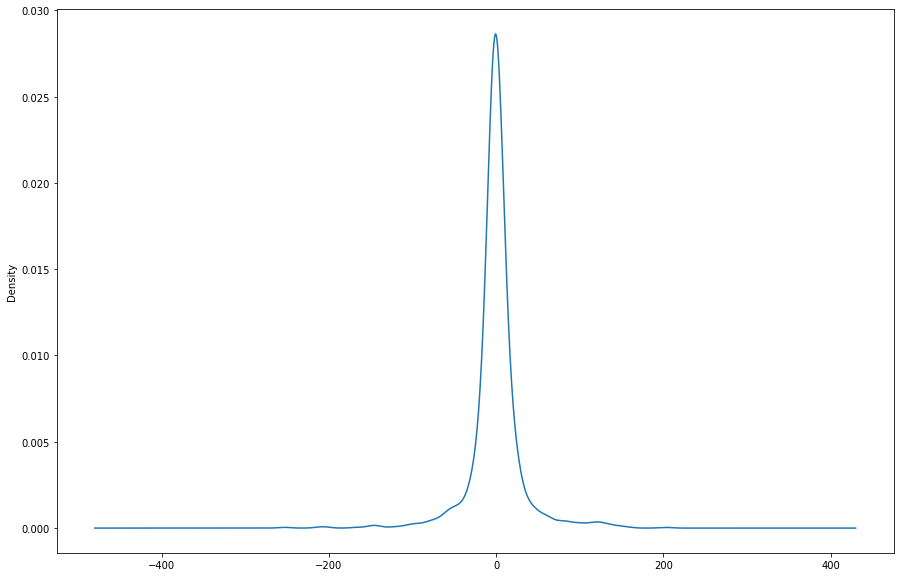

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

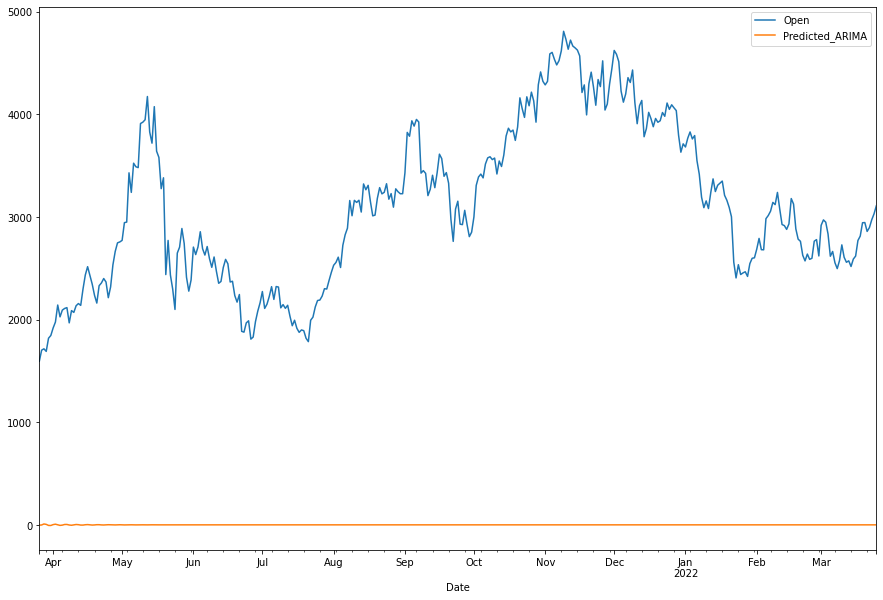

In [ ]:
test_data[['Open','Predicted_ARIMA']].plot()

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA=SARIMAX(train_data['Open'],order=(2,1,3),seasonal_order=(1,1,1,12))

In [ ]:

model_SARIMA_fit=model_SARIMA.fit()

In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Open   No. Observations:                 1233
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -5991.368
Date:                              Fri, 16 Dec 2022   AIC                          11998.736
Time:                                      09:56:55   BIC                          12039.589
Sample:                                  11-09-2017   HQIC                         12014.113
                                       - 03-25-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0095      3.185      0.003      0.998      -6.233       6.252
ar.L2          0.1851      0.991      0.187      0.852      -1.758       2.128
ma.L1         -0.0056      3.184     -0.002      0.999      -6.247       6.236
ma.L2         -0.1471      0.978     -0.150      0.880      -2.064       1.770
ma.L3          0.0091      0.117      0.078      0.938      -0.220       0.239
ar.S.L12      -0.0539      0.016     -3.455      0.001      -0.084      -0.023
ma.S.L12      -0.9993      0.170     -5.883      0.000      -1.332      -0.666
sigma2      1030.8968    166.012      6.210      0.000     705.519    1356.275
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10424.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.54
Prob(H) (two-sided):                  0.01   Kurtosis:                        17.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Open_first_deference,Open_second_deference,Open_twelve_deference,Predicted_ARIMA,Predicted_SARIMA
Date,,,,,,,,,,,
2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098,-86.444336,-88.270263,282.937988,1.044316,1920.166336
2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230,37.670899,124.115235,168.657715,1.044316,1914.551959
2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658,75.370850,37.699951,364.873780,1.044316,1919.773401
2022-03-24,3031.060791,3118.387695,3012.326660,3108.062012,3108.062012,18070503166,57.915771,-17.455079,471.400146,1.044316,1919.167803
2022-03-25,3109.523438,3182.826660,3097.624268,3122.535889,3122.535889,16882068480,78.462647,20.546876,536.035401,1.044316,1924.002807


In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-03-26 00:00:00
2022-03-25 00:00:00


In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2018,3,25),end=datetime(2022,3,25))
residuals=test_data['Open']-pred_Sarima

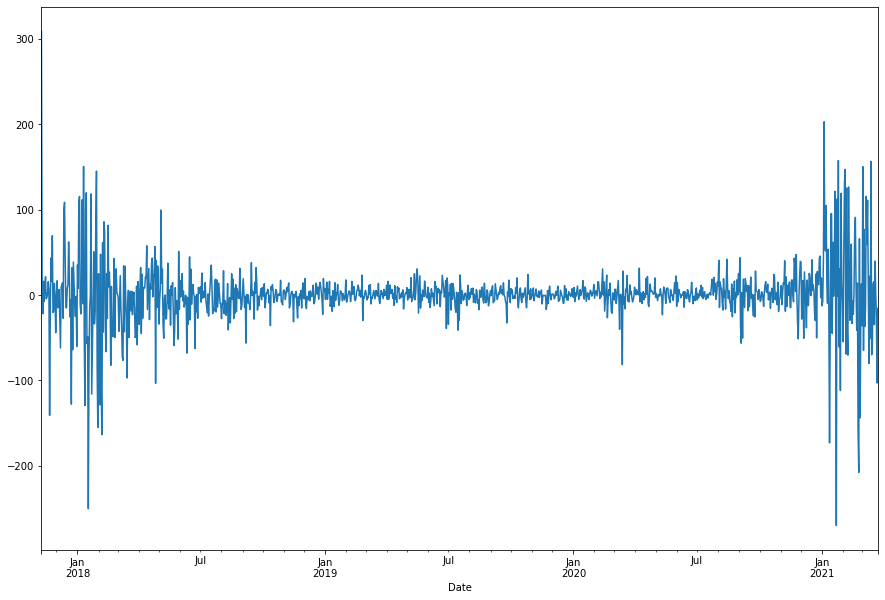

In [ ]:
model_SARIMA_fit.resid.plot()

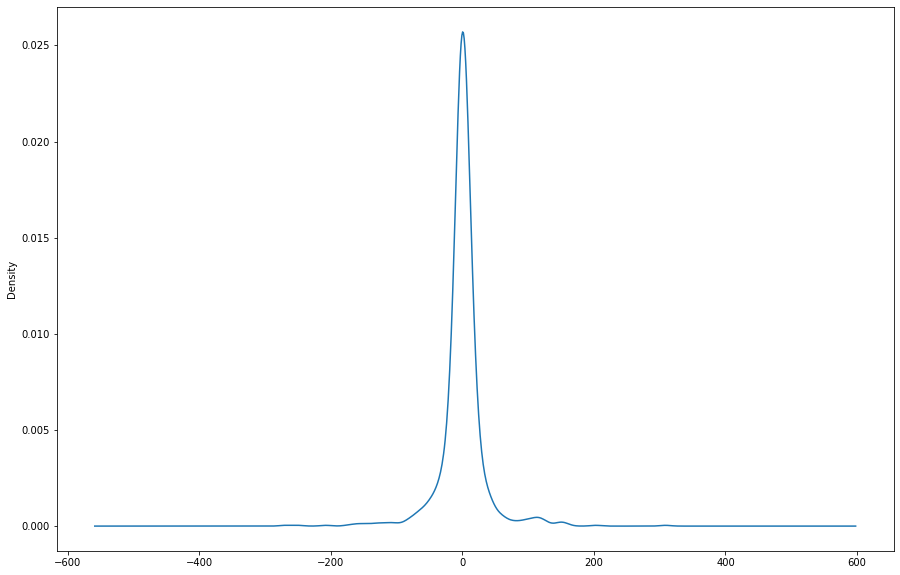

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMA']=pred_Sarima

In [ ]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Open_first_deference,Open_second_deference,Open_twelve_deference,Predicted_ARIMA,Predicted_SARIMA
Date,,,,,,,,,,,
2021-03-26,1595.210083,1702.922852,1594.736694,1702.842041,1702.842041,22548516548,2.086792,86.966064,-328.653687,-1.842566,1587.423941
2021-03-27,1703.036133,1732.824341,1674.319336,1716.494629,1716.494629,18102277710,107.826050,105.739258,-151.050537,-0.286402,1584.390389
2021-03-28,1716.405640,1728.584106,1672.660400,1691.355957,1691.355957,16599472938,13.369507,-94.456543,-76.008178,9.553399,1589.431591
2021-03-29,1691.263184,1837.187988,1683.716553,1819.684937,1819.684937,22796570548,-25.142456,-38.511963,-115.792968,5.662985,1590.269148
2021-03-30,1819.466309,1860.974731,1793.922363,1846.033691,1846.033691,22512781703,128.203125,153.345581,-3.692138,-4.492268,1591.697924
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098,-86.444336,-88.270263,282.937988,1.044316,1975.846845
2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230,37.670899,124.115235,168.657715,1.044316,1973.105586
2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658,75.370850,37.699951,364.873780,1.044316,1975.811782


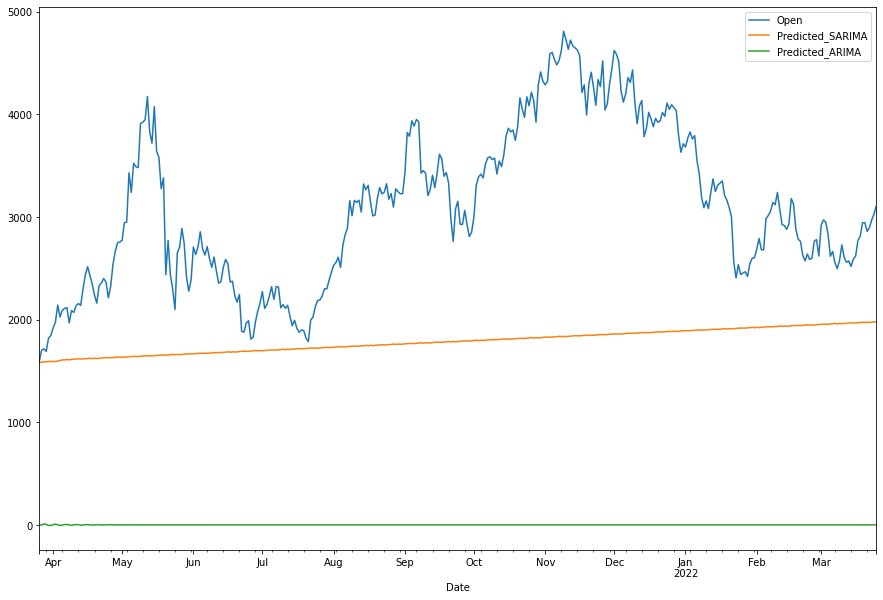

In [ ]:
test_data[['Open','Predicted_SARIMA','Predicted_ARIMA']].plot()